Dataset original:
     A          B          C         D
0  52  53.436183  46.297784  2.939296
1  93  32.369598  54.855513  0.486236
2  15  53.240840  54.354321  1.950439
3  72  46.149177  48.993777  0.178422
4  61  43.230780  42.101582  0.106130

Dataset normalizado (Z-Score):
           A         B         C         D
0  0.045240  0.393337  0.655123  0.595511
1  1.461157 -1.806040  1.237922 -0.750305
2 -1.232539  0.372943  1.203790  0.052997
3  0.735932 -0.367435  0.838726 -0.919180
4  0.356051 -0.672120  0.369353 -0.958841

Verificación de normalidad para las columnas normalizadas:
Columna A: No sigue una distribución normal (p-valor = 0.0001)
Columna B: Sigue una distribución normal (p-valor = 0.9981)
Columna C: No sigue una distribución normal (p-valor = 0.0004)
Columna D: No sigue una distribución normal (p-valor = 0.0000)


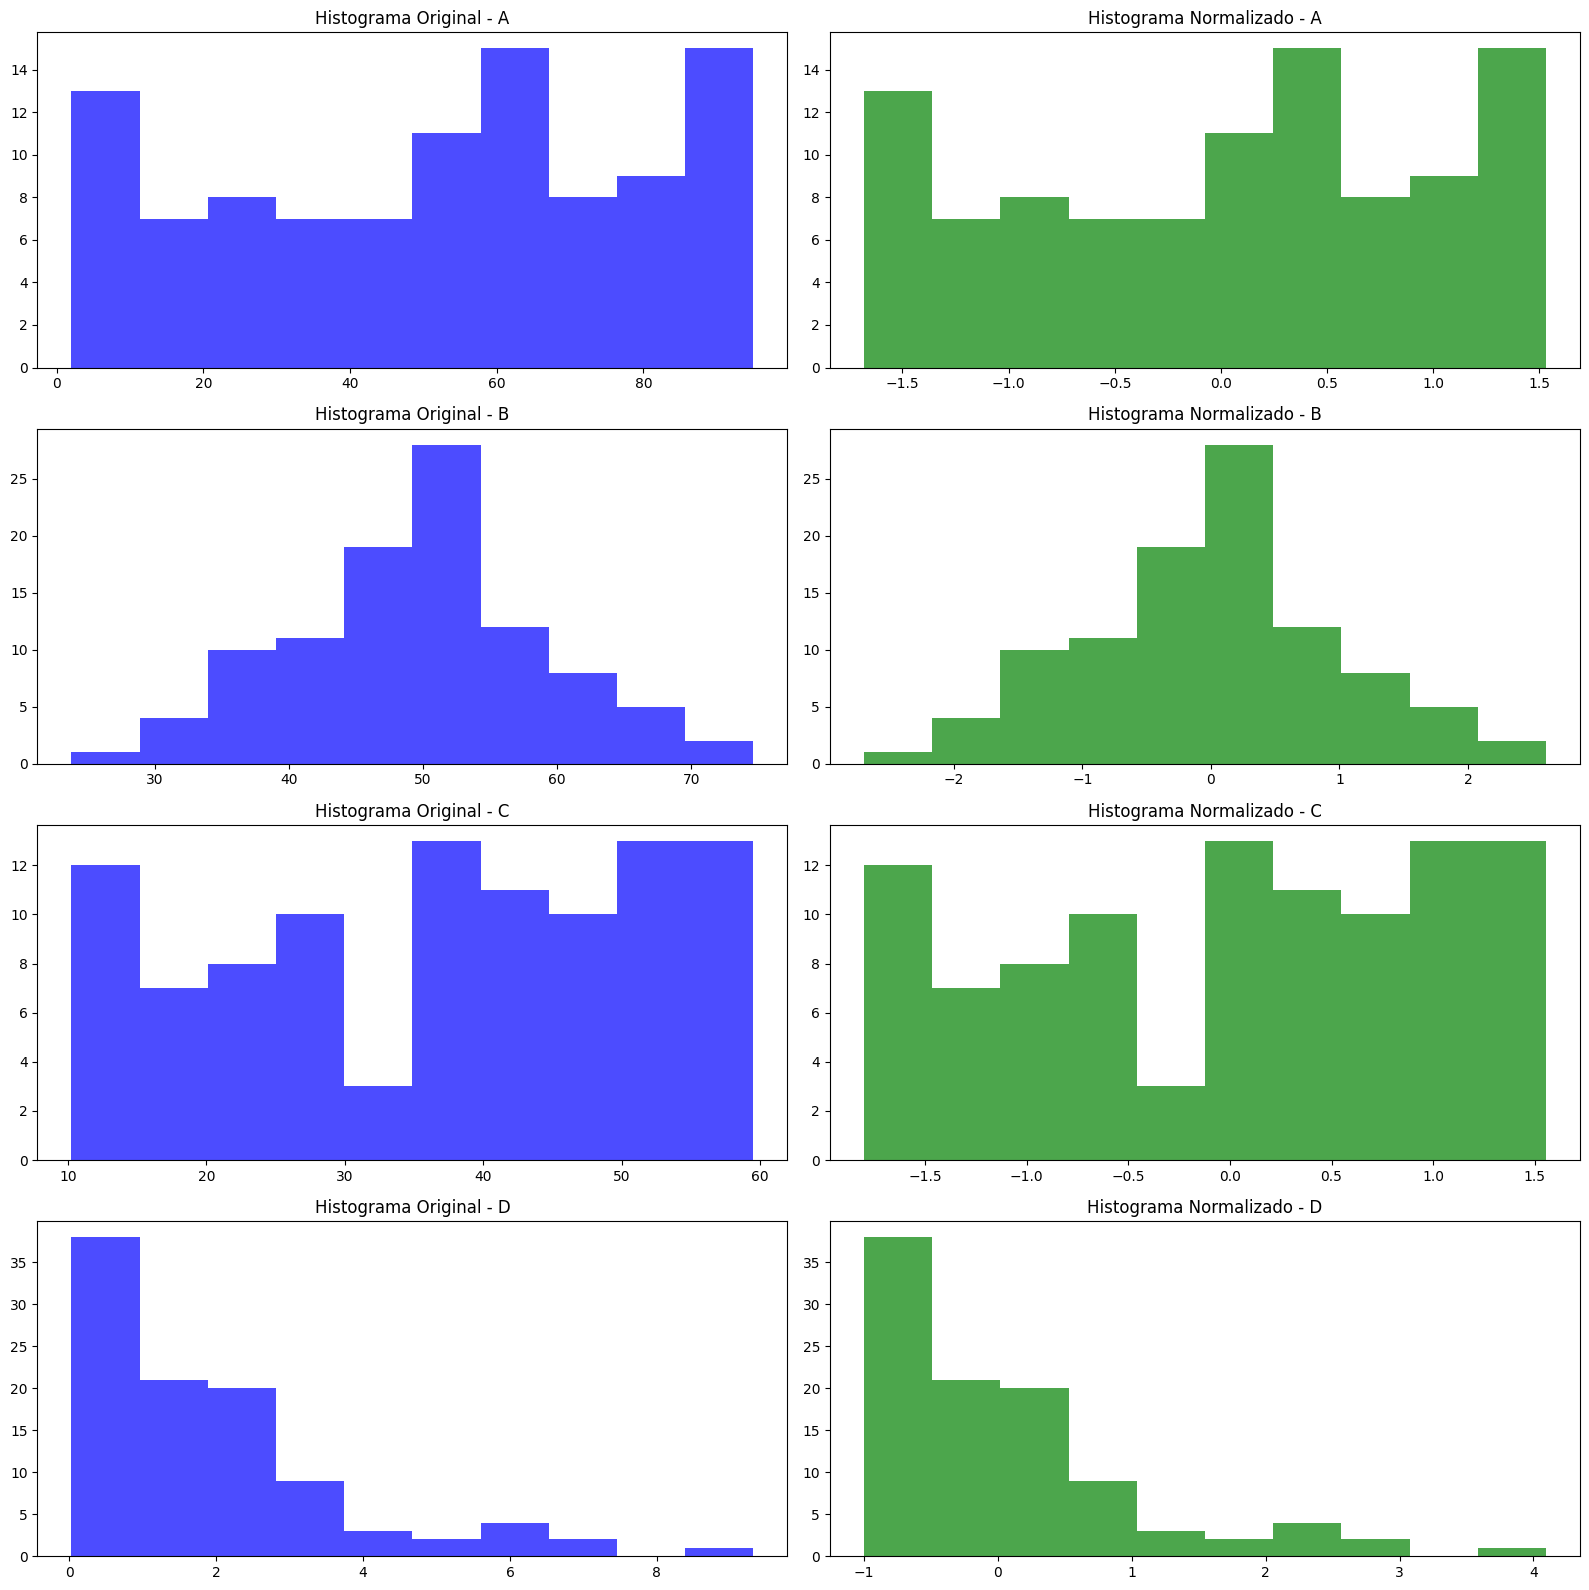

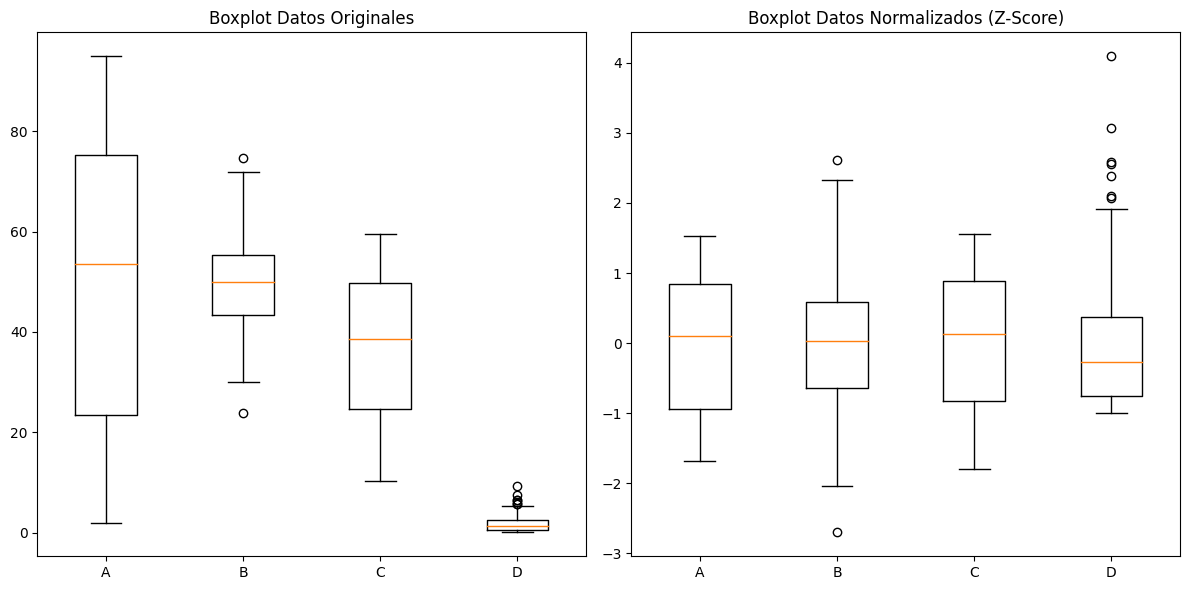

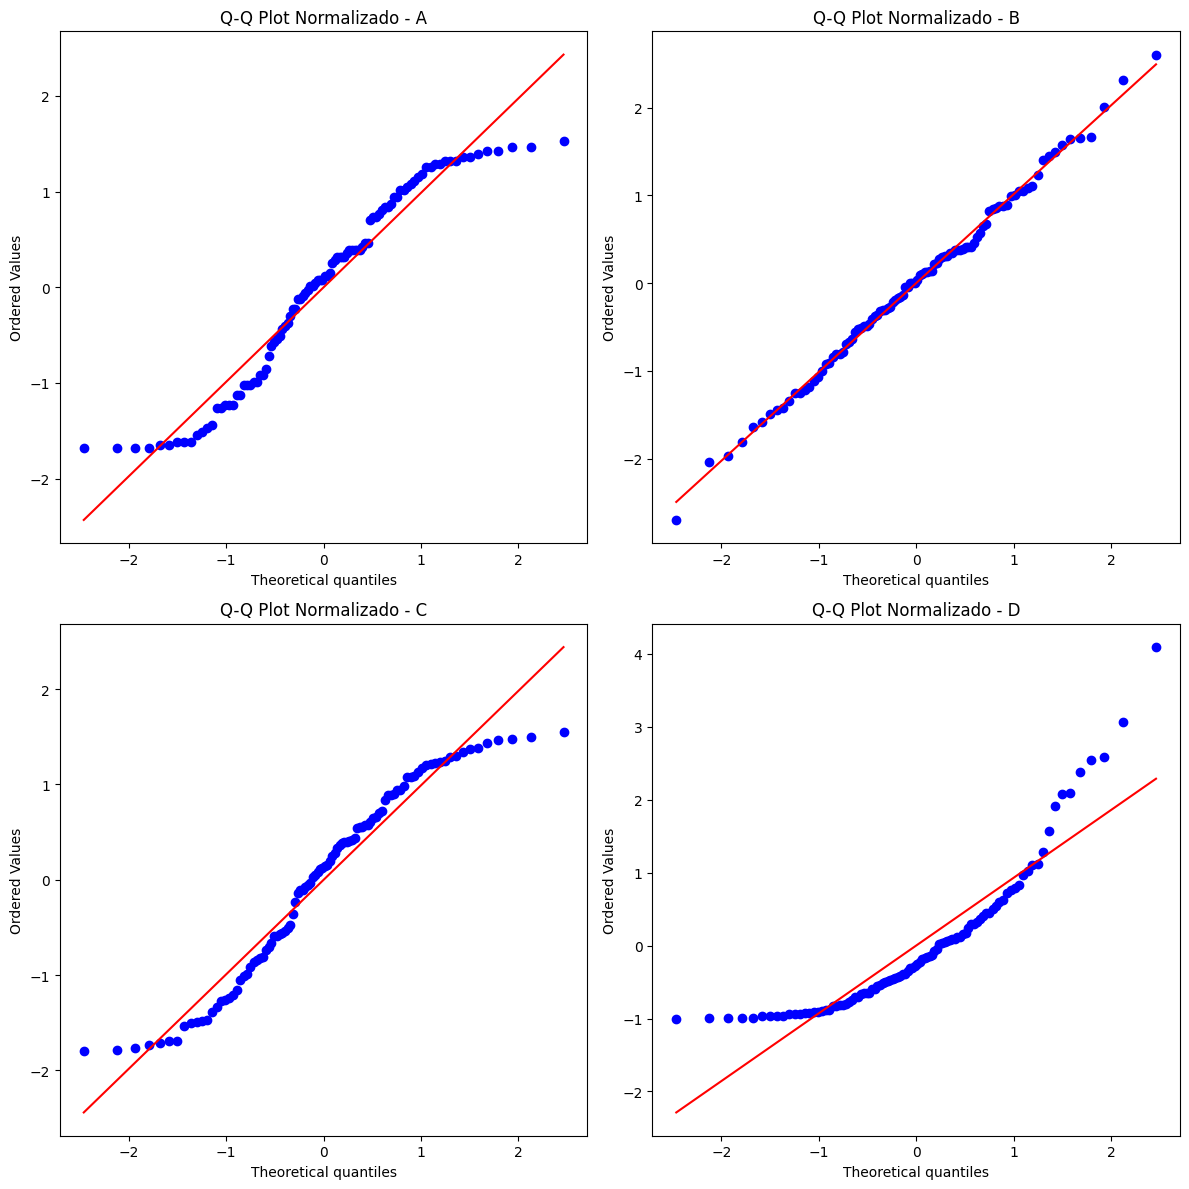

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Paso 1: Generar un dataset aleatorio con múltiples columnas numéricas
np.random.seed(42)
data = {
    'A': np.random.randint(1, 100, size=100),  # Datos enteros entre 1 y 100
    'B': np.random.normal(loc=50, scale=10, size=100),  # Distribución normal
    'C': np.random.uniform(low=10, high=60, size=100),  # Distribución uniforme
    'D': np.random.exponential(scale=2, size=100)  # Distribución exponencial
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar los primeros 5 registros del dataset original
print("Dataset original:\n", df.head())

# Paso 2: Función para aplicar la normalización Z-Score a todas las columnas numéricas
def z_score_normalize_dataframe(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Verificar si la columna es numérica
            mean = df[column].mean()
            std_dev = df[column].std()
            df[column] = (df[column] - mean) / std_dev  # Aplicar Z-Score
    return df

# Crear una copia del DataFrame original para normalizarlo
df_normalized = df.copy()

# Aplicar la normalización a todas las columnas numéricas
df_normalized = z_score_normalize_dataframe(df_normalized)

# Mostrar los primeros 5 registros del dataset normalizado
print("\nDataset normalizado (Z-Score):\n", df_normalized.head())

# Paso 3: Prueba de normalidad (Shapiro-Wilk) y cálculo del p-valor
def check_normality(df):
    for column in df.columns:
        stat, p_value = stats.shapiro(df[column])  # Prueba de Shapiro-Wilk
        if p_value > 0.05:
            print(f'Columna {column}: Sigue una distribución normal (p-valor = {p_value:.4f})')
        else:
            print(f'Columna {column}: No sigue una distribución normal (p-valor = {p_value:.4f})')

# Verificar normalidad en el dataset normalizado
print("\nVerificación de normalidad para las columnas normalizadas:")
check_normality(df_normalized)

# Paso 4: Graficar los histogramas y boxplots antes y después de la normalización
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# Datos originales - Histogramas
axes[0, 0].hist(df['A'], bins=10, color='blue', alpha=0.7)
axes[0, 0].set_title('Histograma Original - A')
axes[1, 0].hist(df['B'], bins=10, color='blue', alpha=0.7)
axes[1, 0].set_title('Histograma Original - B')
axes[2, 0].hist(df['C'], bins=10, color='blue', alpha=0.7)
axes[2, 0].set_title('Histograma Original - C')
axes[3, 0].hist(df['D'], bins=10, color='blue', alpha=0.7)
axes[3, 0].set_title('Histograma Original - D')

# Datos normalizados - Histogramas
axes[0, 1].hist(df_normalized['A'], bins=10, color='green', alpha=0.7)
axes[0, 1].set_title('Histograma Normalizado - A')
axes[1, 1].hist(df_normalized['B'], bins=10, color='green', alpha=0.7)
axes[1, 1].set_title('Histograma Normalizado - B')
axes[2, 1].hist(df_normalized['C'], bins=10, color='green', alpha=0.7)
axes[2, 1].set_title('Histograma Normalizado - C')
axes[3, 1].hist(df_normalized['D'], bins=10, color='green', alpha=0.7)
axes[3, 1].set_title('Histograma Normalizado - D')

plt.tight_layout()
plt.show()

# Boxplots antes y después de la normalización
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot datos originales
axes[0].boxplot([df['A'], df['B'], df['C'], df['D']], labels=['A', 'B', 'C', 'D'])
axes[0].set_title('Boxplot Datos Originales')

# Boxplot datos normalizados
axes[1].boxplot([df_normalized['A'], df_normalized['B'], df_normalized['C'], df_normalized['D']], labels=['A', 'B', 'C', 'D'])
axes[1].set_title('Boxplot Datos Normalizados (Z-Score)')

plt.tight_layout()
plt.show()

# Gráficos Q-Q para verificar la normalización
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Gráficos Q-Q para datos normalizados
stats.probplot(df_normalized['A'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot Normalizado - A')

stats.probplot(df_normalized['B'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot Normalizado - B')

stats.probplot(df_normalized['C'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot Normalizado - C')

stats.probplot(df_normalized['D'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot Normalizado - D')

plt.tight_layout()
plt.show()
